In [101]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [102]:
torch.manual_seed(1)
np.random.seed(1)

In [103]:
x = np.random.uniform(low=-1,high=1,size=(200,2))

In [104]:
y = np.ones(len(x))

In [105]:
y[x[:,0]*x[:,1]<0] = 0

In [106]:
n_train = 100

In [107]:
x_train = torch.tensor(x[:n_train,:],dtype=torch.float32)
y_train = torch.tensor(y[:n_train],dtype=torch.float32)
x_valid = torch.tensor(x[n_train:,:],dtype=torch.float32)
y_valid = torch.tensor(y[n_train:],dtype=torch.float32)

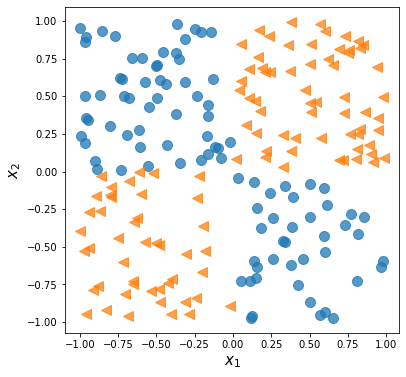

In [108]:
fig = plt.figure(figsize=(6,6))
plt.plot(x[y==0,0],x[y==0,1],'o',alpha=0.75,markersize=10)
plt.plot(x[y==1,0],x[y==1,1],"<",alpha=0.75,markersize=10)
plt.xlabel(r'$x_1$',size=15)
plt.ylabel(r'$x_2$',size=15)
plt.show()

In [109]:
model = nn.Sequential(
    # nn.Linear(2,1),
    # nn.Sigmoid()
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8,8),
    nn.ReLU(),
    nn.Linear(8,1),
    nn.Sigmoid()
)


In [110]:
model

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)

In [111]:
loss_fn = nn.BCELoss()

In [112]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.02)

In [113]:
train_ds = TensorDataset(x_train,y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds,batch_size=batch_size,shuffle=True)

In [114]:
#let's train the model for 200 epochs
num_epochs = 200
def train(model, num_epochs, train_dl,x_valid,y_valid):
    loss_hist_train = [0]*num_epochs
    accuracy_hist_train = [0]*num_epochs
    loss_hist_valid = [0]*num_epochs
    accuracy_hist_valid = [0]*num_epochs
    for epoch in range(num_epochs):
        for x_batch,y_batch in train_dl:
            pred = model(x_batch)[:,0]
            loss = loss_fn(pred,y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred >= 0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()
        loss_hist_train[epoch] /= n_train
        accuracy_hist_train[epoch] /= n_train/batch_size
        pred = model(x_valid)[:,0]
        loss = loss_fn(pred,y_valid)
        is_correct = ((pred >= 0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid


In [115]:
history = train(model, num_epochs, train_dl,x_valid,y_valid)

In [116]:
def plot(history):
    fig = plt.figure(figsize =(16,4))
    ax = fig.add_subplot(1,2,1)
    plt.plot(history[0],lw=4)
    plt.plot(history[1],lw=4)
    plt.legend(['Train loss','Validation loss'],fontsize=15)
    ax.set_xlabel('Epochs',size=15)
    ax = fig.add_subplot(1,2,2)
    plt.plot(history[2],lw=4)
    plt.plot(history[3],lw=4)
    plt.legend(['Train accuracy','Validation accuracy'],fontsize=15)
    ax.set_xlabel('Epochs',size=15)

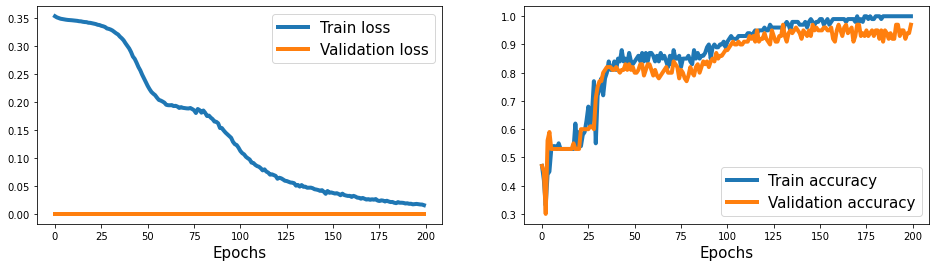

In [117]:
plot(history)